<a href="https://colab.research.google.com/github/chrisvidetto1/Exploratory_Data_Analysis/blob/master/Data_Analysis_CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Medicare Part D Spending - Exploratory Data Analysis
# Stony Brook University
HHA 506 Research Methods for Informatics Professionals
### Submitted by: Christopher Videtto
### Faculty: Prof. Hants Williams Ph.D.

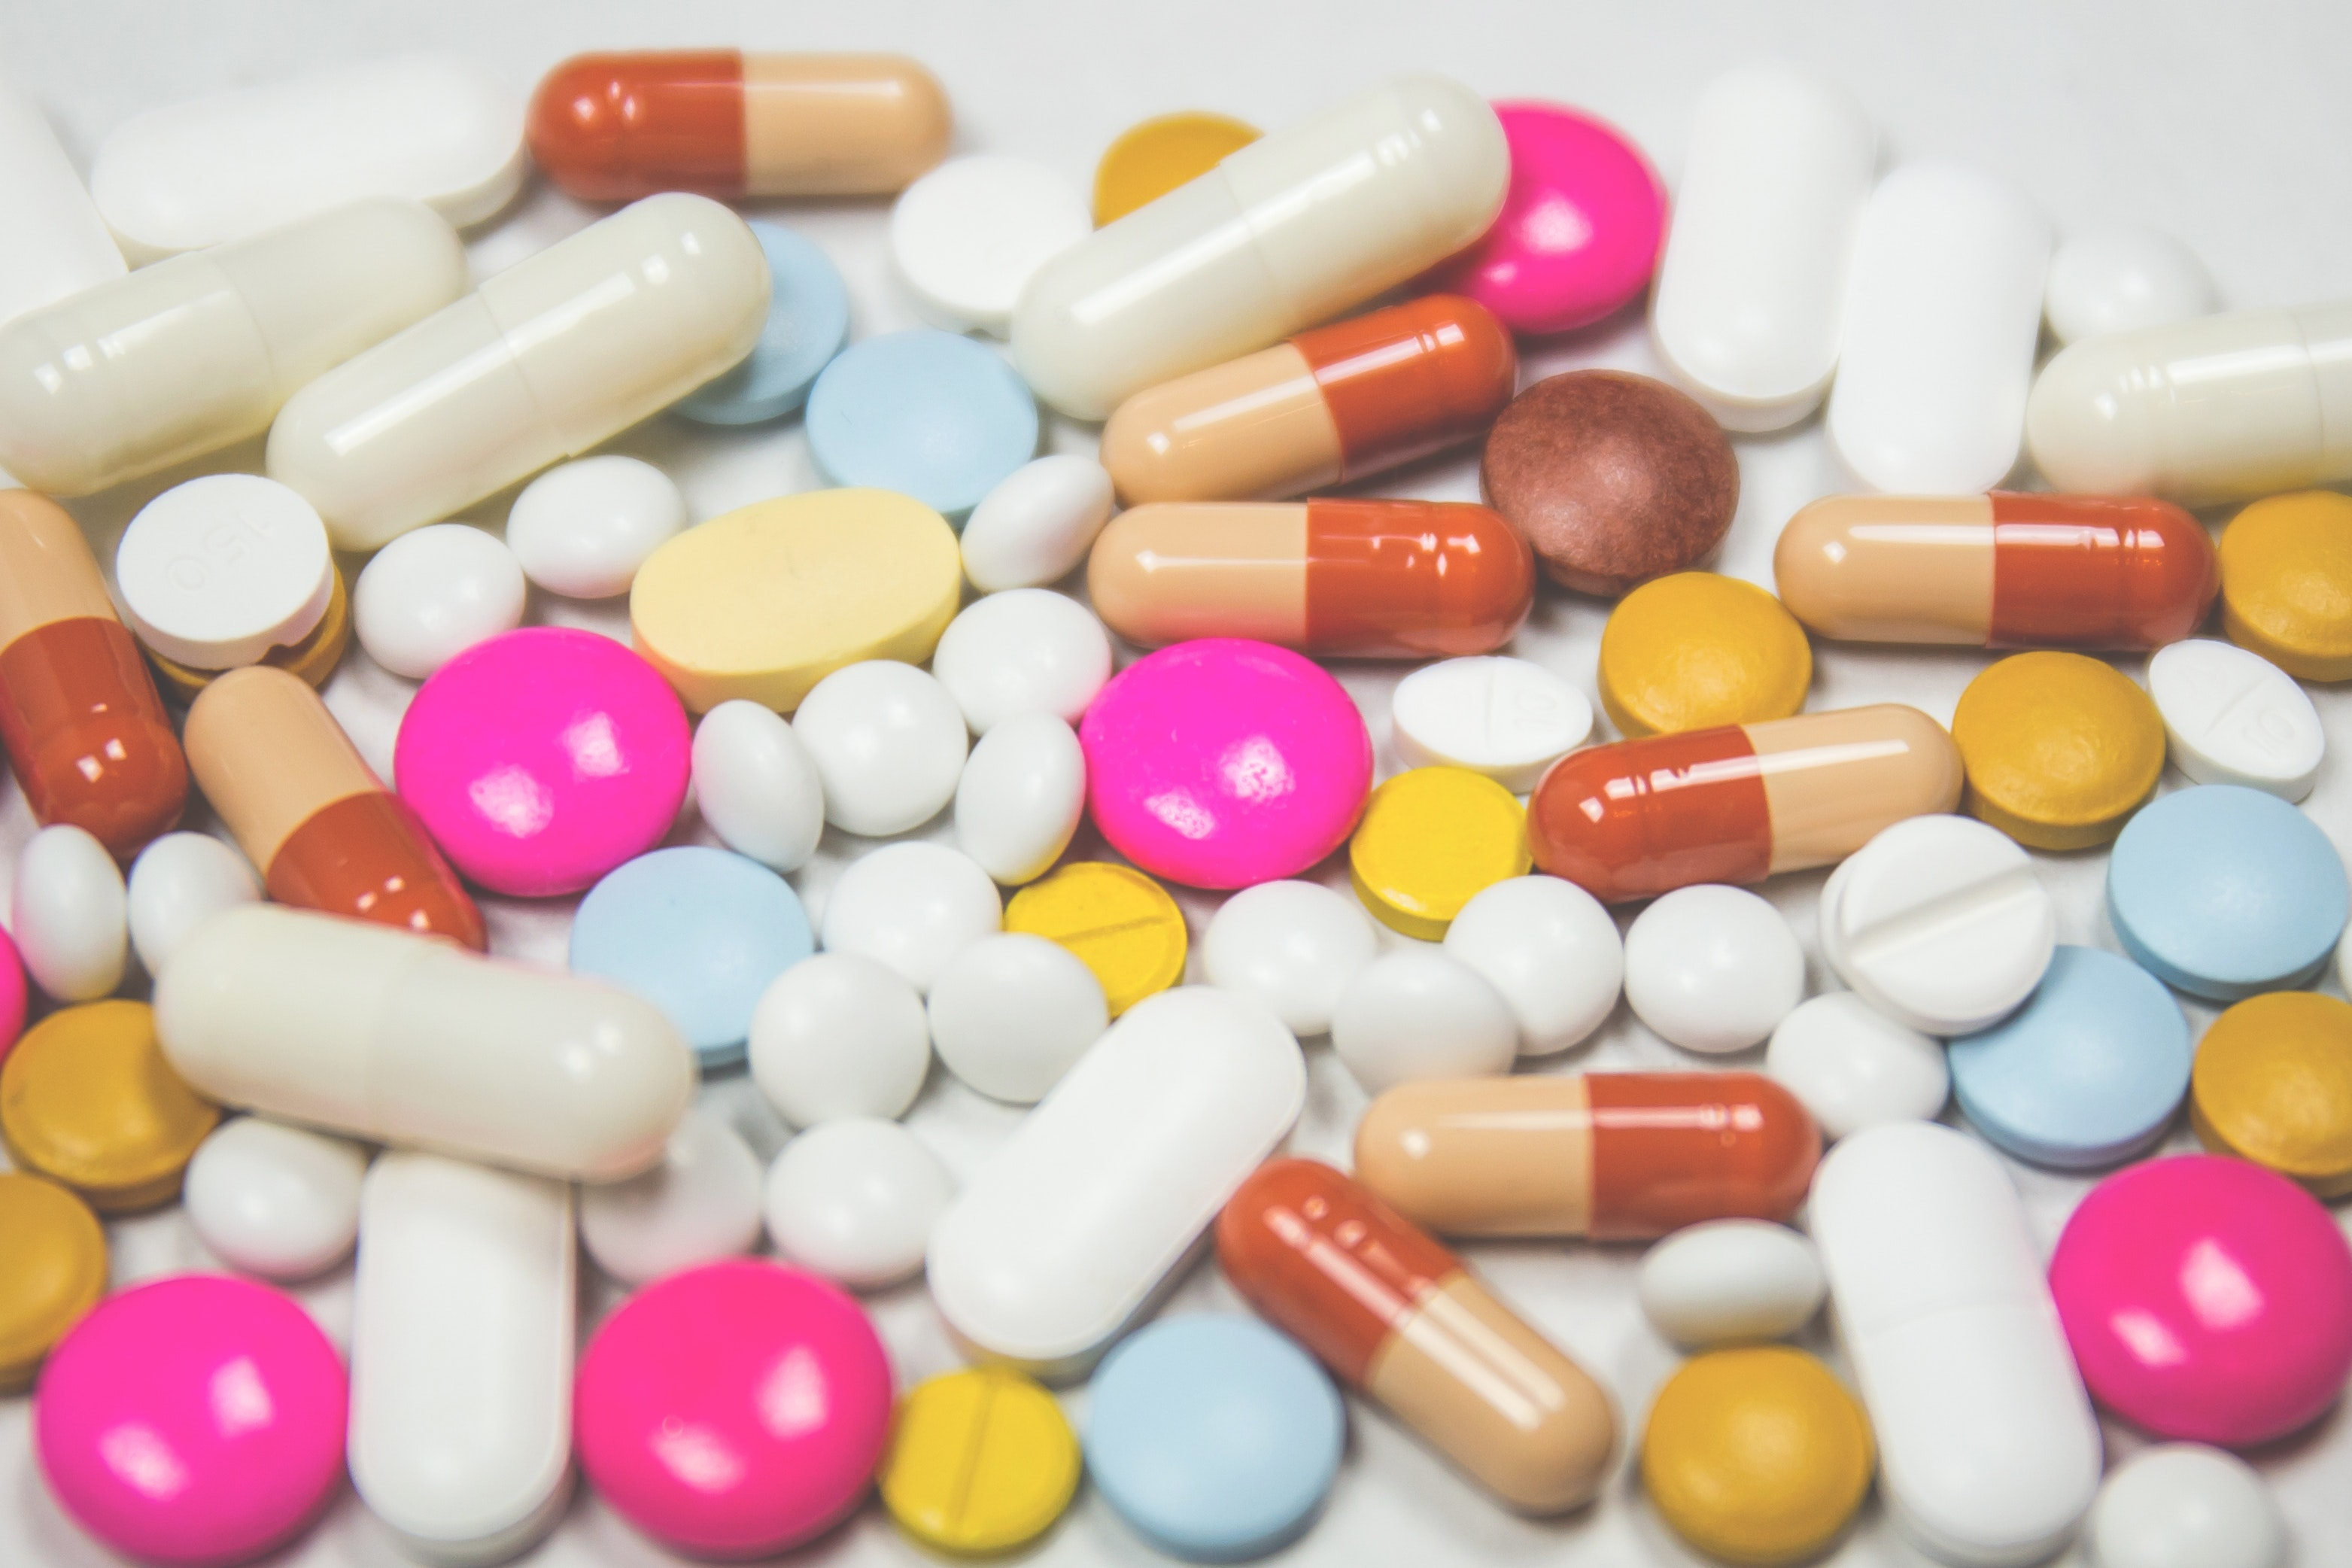


In [ ]:
### Lets begin this EDA by setting up the environment in this notebook

import io
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
### Now we need to import the data set that I found on Medicare's CMS.gov Website
from google.colab import files
uploaded = files.upload()

Saving Medicare_PartD_Spending2018.csv to Medicare_PartD_Spending2018 (1).csv


In [7]:
# Lets take a look at the initial data set
df = pd.read_csv(io.BytesIO(uploaded['Medicare_PartD_Spending2018.csv']))
df

,Brand Name,Generic Name,Number of Manufacturers,Total Spending,Total Dosage Units,Total Claims,Total \nBeneficiaries,Average Spending Per Dosage Unit (Weighted),Average \nSpending Per Claim,Average \nSpending Per Beneficiary,Outlier \nFlag,Change in Average Spending Per Dosage Unit (2017-2018)
0,1st Tier Unifine Pentips,"Pen Needle, Diabetic",1,"$167,193.78","761,658","6,538","2,341",$0.22,$25.57,$71.42,0,1.70%
1,1st Tier Unifine Pentips Plus,"Pen Needle, Diabetic",1,"$369,416.83","1,814,008","14,932","5,675",$0.20,$24.74,$65.10,0,-6.30%
2,Abacavir,Abacavir Sulfate,9,"$14,479,715.39","3,972,983","54,467","7,359",$4.04,$265.84,"$1,967.62",0,-5.83%
3,Abacavir-Lamivudine,Abacavir Sulfate/Lamivudine,5,"$24,587,440.48","2,225,584","70,494","8,684",$11.06,$348.79,"$2,831.35",1,-45.84%
4,Abacavir-Lamivudine-Zidovudine,Abacavir/Lamivudine/Zidovudine,1,"$6,955,321.12","330,735","5,298",710,$21.03,"$1,312.82","$9,796.23",0,-3.04%
...,...,...,...,...,...,...,...,...,...,...,...,...
3469,Zyprexa Zydis,Olanzapine,1,"$4,465,981.99","156,361","3,426",406,$29.24,"$1,303.56","$10,999.96",0,7.90%
3470,Zyprexa*,Olanzapine,1,"$20,421,145.92","823,090","18,410","2,182",$25.37,"$1,109.24","$9,358.91",0,8.35%
3471,Zytiga,Abiraterone Acetate,2,"$1,475,649,550.90","14,842,923","144,948","24,289",$108.75,"$10,180.54","$60,753.82",0,29.65%
3472,Zyvox,Linezolid,1,"$860,973.30","6,628",165,126,$203.87,"$5,218.02","$6,833.12",1,25.90%


## Exploring The Data
##### Potential independent/predictor variables : Brand name, Number of manufacturers
##### Potential dependent/criterion Variables: Total spending, Average price per dosage unit
We also see that we need to clean up this data!!
First, lets figure out what type of data each feature is...

In [ ]:
df.dtypes

Brand Name                                                object
Generic Name                                              object
Number of Manufacturers                                    int64
Total Spending                                            object
Total Dosage Units                                        object
Total Claims                                              object
Total \nBeneficiaries                                     object
Average Spending Per Dosage Unit (Weighted)               object
Average \nSpending Per Claim                              object
Average \nSpending Per Beneficiary                        object
Outlier \nFlag                                            object
Change in Average Spending Per Dosage Unit (2017-2018)    object
dtype: object

##### Here we see the majority of data types are not numbers
##### We will need to do multiple transformations!
##### Remove the '$' from total spending
##### Remove the ',' commas from all numbers
##### Clean up the name of the features and remove '\n'
##### Convert numbers to floating integers

In [8]:
### Clean up Total Spending name and convert to float
df['Total Spending'] = df['Total Spending'].str.replace('$', '')
df['Total Spending'] = df['Total Spending'].str.replace(',', '').astype(float)

In [9]:
### Clean up Average Spending per unit and convert to float
df['Average Spending Per Dosage Unit (Weighted)'] = df['Average Spending Per Dosage Unit (Weighted)'].str.replace('$', '')
df['Average Spending Per Dosage Unit (Weighted)'] = df['Average Spending Per Dosage Unit (Weighted)'].str.replace(',', '').astype(float)

In [10]:
### Force pandas to stop using scientific notation, and only use 2 decimals to represent currency
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [11]:
### Clean up column names
df.rename(columns = {'Total \nBeneficiaries' : 'Total Beneficiaries'}, inplace = True)
df.rename(columns = {'Average \nSpending Per Claim' : 'Average Spending Per Claim'}, inplace = True)
df.rename(columns = {'Average \nSpending Per Beneficiary' : 'Average Spending Per Beneficiary'}, inplace = True)
df.rename(columns = {'Average Spending Per Dosage Unit (Weighted)' : 'Average Price Per Dose'}, inplace = True)
df.rename(columns = {'Outlier \nFlag' : 'Outlier Flag'}, inplace = True)

In [12]:
### Confirm that our changes to the features worked
df.dtypes

Brand Name                                                 object
Generic Name                                               object
Number of Manufacturers                                     int64
Total Spending                                            float64
Total Dosage Units                                         object
Total Claims                                               object
Total Beneficiaries                                        object
Average Price Per Dose                                    float64
Average Spending Per Claim                                 object
Average Spending Per Beneficiary                           object
Outlier Flag                                               object
Change in Average Spending Per Dosage Unit (2017-2018)     object
dtype: object

In [13]:
###Lets create a new data frame with the specific variables we are interested in...
df2 = df[['Brand Name','Number of Manufacturers','Total Spending','Average Price Per Dose']]

In [14]:
df2

,Brand Name,Number of Manufacturers,Total Spending,Average Price Per Dose
0,1st Tier Unifine Pentips,1,167193.78,0.22
1,1st Tier Unifine Pentips Plus,1,369416.83,0.20
2,Abacavir,9,14479715.39,4.04
3,Abacavir-Lamivudine,5,24587440.48,11.06
4,Abacavir-Lamivudine-Zidovudine,1,6955321.12,21.03
...,...,...,...,...
3469,Zyprexa Zydis,1,4465981.99,29.24
3470,Zyprexa*,1,20421145.92,25.37
3471,Zytiga,2,1475649550.90,108.75
3472,Zyvox,1,860973.30,203.87


In [ ]:
### Beautiful!! 
### Lets check for null values in Total Spending and Average Price Per Dose because we are using this for a plot later

df_check = pd.DataFrame(df['Total Spending'])
df_check.isnull().values.sum()
df_check = pd.DataFrame(df['Average Price Per Dose'])
df_check.isnull().values.sum()

0

In [ ]:
### Excellent, there are no null values

### What are the 10 most popular drugs that Medicare spends money on?

In [ ]:
df_desc = df2.sort_values('Total Spending', ascending=False)
df_desc.head(10)

,Brand Name,Number of Manufacturers,Total Spending,Average Price Per Dose
992,Eliquis,1,4992184164.40,7.00
2632,Revlimid,1,4065088800.50,697.35
3340,Xarelto,1,3358810708.00,13.97
1532,Januvia,1,3228917720.20,14.24
1784,Lyrica,1,2950257660.50,7.55
61,Advair Diskus,1,2394014929.40,6.71
1379,Humira Pen,1,2388794496.60,2457.83
1635,Lantus Solostar,1,2370490821.50,26.54
1438,Imbruvica,1,1867207012.50,303.62
2882,Symbicort,1,1751221155.50,31.63


### Interesting... 
### Now, lets investigate the relationship between Number of Manufacturers and Total Spending or Average Spending Per Dosage Unit

In [15]:
### First, do a value count and statistical analysis
df['Number of Manufacturers'].value_counts()

1     2411
2      300
3      137
5       83
7       74
4       73
6       61
8       46
9       42
11      38
10      37
12      28
13      22
15      20
17      18
14      13
16      11
22       9
21       6
18       6
19       5
25       5
23       5
24       4
20       4
26       3
30       2
32       2
31       2
28       2
33       1
38       1
27       1
29       1
44       1
Name: Number of Manufacturers, dtype: int64

In [ ]:
df2.describe()

,Number of Manufacturers,Total Spending,Average Price Per Dose
count,3474.00,3474.00,3474.00
mean,2.75,48399232.88,236.71
std,4.19,212573809.03,1608.53
min,1.00,112.71,0.00
25%,1.00,95246.18,0.84
50%,1.00,1450777.06,5.51
75%,2.00,17986335.22,26.83
max,44.00,4992184164.40,38586.16


In [ ]:
### Look at central tendency, distribution of responses, and quartile ranges
df2_group = df2.groupby(['Number of Manufacturers'])
df2_group.describe()

Total Spending               ... Average Price Per Dose         
                                 count         mean  ...                    75%      max
Number of Manufacturers                              ...                                
1                              2411.00  52716782.61  ...                  50.65 38586.16
2                               300.00  18134759.57  ...                  15.97 20578.21
3                               137.00   6392471.89  ...                   5.50   306.23
4                                73.00  13544467.94  ...                   5.52   176.64
5                                83.00  24760294.10  ...                   4.93    82.06
6                                61.00  21632527.83  ...                   3.58   124.09
7                                74.00  26734960.26  ...                   4.21   374.78
8                                46.00  25025474.50  ...                   2.92    54.26
9                                42.00  53280985.81  ...                   2.76    63.25
10                               37.00  69026236.16  ...                   2.48    34.05
11                               38.00  58894998.45  ...                   2.42   152.07
12                               28.00  63049315.79  ...                   1.47   276.88
13                               22.00  92117711.02  ...                   1.29    43.30
14                               13.00  53440099.49  ...                   0.92    17.04
15                               20.00  79652098.16  ...                   1.04     8.00
16                               11.00  81505370.22  ...                   0.47     2.68
17                               18.00 111331462.19  ...                   0.76     2.97
18                                6.00 158544926.69  ...                   0.79     1.60
19                                5.00  51868584.15  ...                   4.42    20.51
20                                4.00 109463564.39  ...                   0.46     1.16
21                                6.00 239310614.85  ...                   2.04     2.75
22                                9.00 257457365.52  ...                   0.86     4.82
23                                5.00  96434200.14  ...                   0.37     1.13
24                                4.00 108383191.88  ...                   0.34     0.55
25                                5.00 233229623.76  ...                   0.27     0.39
26                                3.00 150778685.00  ...                   0.52     0.93
27                                1.00 529426439.49  ...                   0.29     0.29
28                                2.00 372402844.19  ...                   0.35     0.42
29                                1.00  48320119.59  ...                   0.71     0.71
30                                2.00 137520080.91  ...                   0.92     1.14
31                                2.00 120745792.28  ...                   0.41     0.45
32                                2.00 277863900.06  ...                   0.34     0.41
33                                1.00 189787279.70  ...                   0.06     0.06
38                                1.00 119366824.34  ...                   0.27     0.27
44                                1.00 579940201.97  ...                   0.15     0.15

[35 rows x 16 columns]

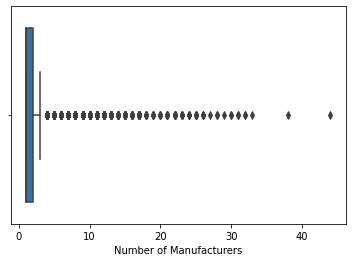

In [ ]:
### Try representing this data as a box plot instead of just numbers
import seaborn as sns
sns.boxplot(x=df2['Number of Manufacturers'])

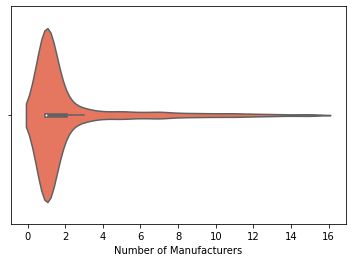

In [ ]:
### Lets exclude some of these outliars with manufacturers  
### that are greater than 3 standard deviations or > 15
df_manufacturers = df2[df2['Number of Manufacturers'] <= 15]
sns.violinplot(x=df_manufacturers['Number of Manufacturers'], palette='Reds')


### Does medicare spending go to drugs with only one manufacturer?
### Does increasing number of manufacturers decrease price? 
### Investigate IV/DV: Number of manufactuers/Total Spending
### Number of manufacturer/avg spending per unit
### Lets visalize this data differently

[(0.0, 600000000.0)]

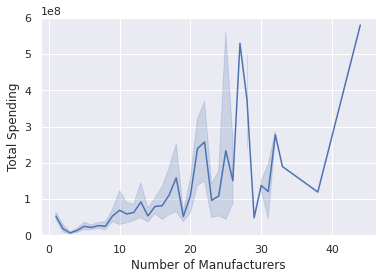

In [ ]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

ax = sns.lineplot(x="Number of Manufacturers", y="Total Spending", data=df2)
ax.set(ylim = (0,600000000))

### Looks like Total Spending varies but what about Price Per Dose?
### Lets create a visualization that represents what happens when the patent expires on a pharmaceutical and the number of manufacturers increase from only one to a total of five manufacturers...


[(1.0, 5.0)]

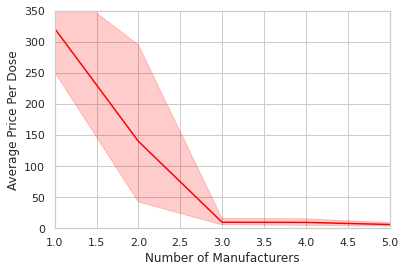

In [ ]:
ax = sns.lineplot(x="Number of Manufacturers", y="Average Price Per Dose", data=df2, palette='flare', color='red')
ax.set(ylim = (0,350))
ax.set(xlim = (1, 5))

### Wow this is a great visualization which represents a unique relationship in the pharmaceutical industry...
### As the Number of Manufacturers for a drug increases, the Average Price Per dose decreases!!


# Thanks for reading :)